### Time to analyse that data! First let's import all libraries and import *clean_sharks.csv* into a new dataframe for analysis. Also, let's only keep "proven" shark attacks. That is, we will discard registers in which the "Type" variable is set to "Invalid":

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

clean_sharks = pd.read_csv('./clean_sharks.csv',sep=",")
clean_sharks = clean_sharks[clean_sharks["Type"]!="Invalid"]
clean_sharks.head(1)

,Month,Year,Type,Country,Area,Location,Activity,Sex,Age,Age range,Injury,Fatal,Time,Time of day,Species,Case Number,Date
0,9,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,12-17,Minor injury to thigh,N,13h00,1. Afternoon,Unknown,2016.09.18.c,18-Sep-16


## Now I'll try to confirm different hypothesis:

### 0. "Men are more likely to survive a shark attack than women":

In [2]:
sharks0 = clean_sharks.copy()[clean_sharks["Sex"]!="Unknown"]
men_women = pd.DataFrame()
men_women ["Reported attacks"] = sharks0.groupby(["Sex"]).count()["Fatal"]
men_women ["Avg Age"] = sharks0[sharks0["Age"] > 0].groupby(["Sex"]).mean()["Age"]
men_women ["Survived"] = sharks0[sharks0["Fatal"]=="N"].groupby(["Sex"]).count()["Fatal"]
men_women ["Died"] = sharks0[sharks0["Fatal"]=="Y"].groupby(["Sex"]).count()["Fatal"]
men_women ["Unknown"] = sharks0[sharks0["Fatal"]=="Unknown"].groupby(["Sex"]).count()["Fatal"]
men_women ["Survival rate %"] = round((men_women["Survived"]/(men_women["Survived"]+men_women["Died"]))*100,2)
men_women = men_women.reset_index().rename_axis(None).rename_axis(None, axis=1)
men_women


,Sex,Reported attacks,Avg Age,Survived,Died,Unknown,Survival rate %
0,F,471,26.603933,382,85,4,81.80
1,M,4021,26.870183,3074,912,35,77.12


Well look at that! Of course I was wrong, I was just emmmm... trying to prove women are stronger than men!
The data shows that, based on the reported shark attacks, almost 82% of women have survived an attack while 77% of men have survived. Let's see what happens if we throw in age into the equation.

### 1. "Children are more likely to die in a shark attack":

In [3]:
sharks1 = clean_sharks.copy()[(clean_sharks["Sex"]!="Unknown")&(clean_sharks["Age range"]!="Unknown")]
men_women_age = pd.DataFrame()
men_women_age ["Reported attacks"] = sharks1.groupby(["Sex","Age range"]).count()["Fatal"]
men_women_age ["Survived"] = sharks1[sharks1["Fatal"]=="N"].groupby(["Sex","Age range"]).count()["Fatal"]
men_women_age ["Died"] = sharks1[sharks0["Fatal"]=="Y"].groupby(["Sex","Age range"]).count()["Fatal"]
men_women_age ["Survival rate %"] = round((men_women_age["Survived"]/(men_women_age["Survived"]+men_women_age["Died"]))*100,2)
men_women_age.fillna(0,inplace=True)
men_women_age = men_women_age.reset_index().rename_axis(None).rename_axis(None, axis=1)
men_women_age

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Sex,Age range,Reported attacks,Survived,Died,Survival rate %
0,F,1-12,47,44.0,3,93.62
1,F,12-17,92,81.0,10,89.01
2,F,18-24,71,55.0,16,77.46
3,F,25-34,47,38.0,9,80.85
4,F,35-44,41,35.0,6,85.37
5,F,45-54,24,21.0,3,87.50
6,F,55-64,25,21.0,4,84.00
7,F,65-74,7,3.0,4,42.86
8,F,75+,2,0.0,2,0.00
9,M,1-12,122,102.0,20,83.61


In [4]:
sharks2 = clean_sharks.copy()[(clean_sharks["Age range"]!="Unknown")]
age = pd.DataFrame()
age ["Reported attacks"] = sharks1.groupby(["Age range"]).count()["Fatal"]
age ["Survived"] = sharks1[sharks1["Fatal"]=="N"].groupby(["Age range"]).count()["Fatal"]
age ["Died"] = sharks1[sharks0["Fatal"]=="Y"].groupby(["Age range"]).count()["Fatal"]
age ["Survival rate %"] = round((age["Survived"]/(age["Survived"]+age["Died"]))*100,2)
age.fillna(0,inplace=True)
age = age.reset_index().rename_axis(None).rename_axis(None, axis=1)
age

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Age range,Reported attacks,Survived,Died,Survival rate %
0,1-12,169,146,23,86.39
1,12-17,614,498,111,81.77
2,18-24,739,578,157,78.64
3,25-34,602,497,105,82.56
4,35-44,352,298,54,84.66
5,45-54,209,175,34,83.73
6,55-64,97,80,17,82.47
7,65-74,31,19,12,61.29
8,75+,8,4,4,50.00


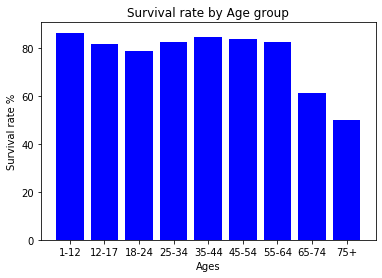

In [5]:
plt.bar(age['Age range'],age['Survival rate %'], color='blue', sketch_params=False)
plt.title('Survival rate by Age group')
plt.xlabel('Ages')
plt.ylabel('Survival rate %')
plt.show()

Once again I've been proven wrong. The data shows that children actually have a higher survival rate (86%) than the rest of age groups. In fact, people who are 75+ years old are the group with the lowest survival rate.  

### 2. "Shark attack reports have increased through the years, but the number of attacks that end in death has decreased"

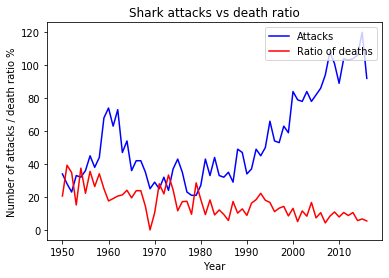

In [6]:
sharks3=clean_sharks[clean_sharks["Year"] >= 1950]

years = pd.DataFrame()
years ["Attacks"] = sharks3.groupby(["Year"]).count()["Month"]
years ["Deaths"] = sharks3[sharks3["Fatal"]=="Y"].groupby(["Year"]).count()["Month"]
years ["Deaths ratio %"] = (years ["Deaths"]/years ["Attacks"])*100
years.fillna(0,inplace=True)
years = years.reset_index().rename_axis(None).rename_axis(None, axis=1)

plt.plot(years.groupby(["Year"]).sum()["Attacks"], label = 'Attacks', c='blue')
plt.plot(years.groupby(["Year"]).sum()["Deaths ratio %"], label = 'Ratio of deaths', c='red')
plt.legend(loc=1)
plt.title('Shark attacks vs death ratio')
plt.xlabel('Year')
plt.ylabel('Number of attacks / death ratio %')
plt.show()


We can see that, indeed, shark attack reports have increased in the las 30-40 years. However, the ratio between deaths and reports has decreased, which means that either the number of deaths by shark attack has decreased or stayed the same for the last 30-40 years. Let's confirm what's going on with deaths by shark attack by looking at the next chart:

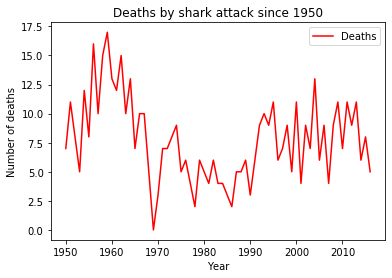

In [7]:
plt.plot(years.groupby(["Year"]).sum()["Deaths"], label = 'Deaths', c='red')
plt.legend(loc=1)
plt.title('Deaths by shark attack since 1950')
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.show()

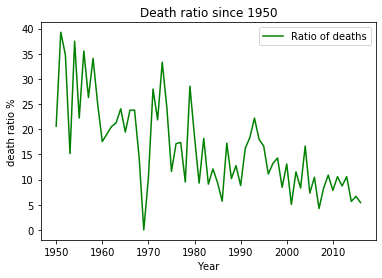

In [8]:
plt.plot(years.groupby(["Year"]).sum()["Deaths ratio %"], label = 'Ratio of deaths', c='green')
plt.legend(loc=1)
plt.title('Death ratio since 1950')
plt.xlabel('Year')
plt.ylabel('death ratio %')
plt.show()

### 3. "*More people == more attacks*. The number of attack reports increases with the human population growth":

To prove this I will need to import a new dataset that contains countries' populations by year from 1960 to 2016. The dataset can be found here: https://www.kaggle.com/gemartin/world-bank-data-1960-to-2016.

I have saved the *csv* file on the same folder as these notebooks and will import it as a dataframe:

In [9]:
world_pop = pd.read_csv('country_population.csv',sep=",")
world_pop = world_pop[world_pop["Country Name"]=="World"]
world_pop.drop(["Country Name","Country Code","Indicator Name","Indicator Code"],axis=1,inplace=True)
world_pop=world_pop.transpose()
world_pop.columns = ["Population (100M)"]
world_pop["Population (100M)"] = world_pop["Population (100M)"]/100000000
world_pop = world_pop.reset_index().rename_axis("None").rename_axis(None, axis=1)
world_pop.columns = ["Year","Population (100M)"]
world_pop["Year"] = world_pop["Year"].astype("int64")
world_pop.head(5)

,Year,Population (100M)
None,,
0,1960,30.321604
1,1961,30.733686
2,1962,31.265098
3,1963,31.917864
4,1964,32.574597


Now I'll merge this dataframe with the one we used previously:

In [10]:
pop_attacks=world_pop.merge(years,how="left",on="Year")
pop_attacks.head()

,Year,Population (100M),Attacks,Deaths,Deaths ratio %
0,1960,30.321604,74,13.0,17.567568
1,1961,30.733686,63,12.0,19.047619
2,1962,31.265098,73,15.0,20.547945
3,1963,31.917864,47,10.0,21.276596
4,1964,32.574597,54,13.0,24.074074


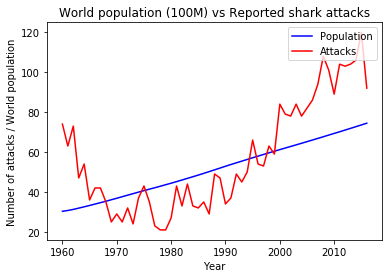

In [11]:
plt.plot(pop_attacks.groupby(["Year"]).sum()["Population (100M)"], label = 'Population', c='blue')
plt.plot(pop_attacks.groupby(["Year"]).sum()["Attacks"], label = 'Attacks', c='red')
plt.legend(loc=1)
plt.title('World population (100M) vs Reported shark attacks')
plt.xlabel('Year')
plt.ylabel('Number of attacks / World population')
plt.show()

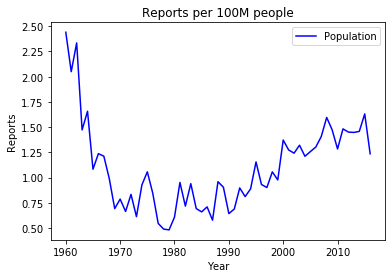

In [12]:
plt.plot(pop_attacks.groupby(["Year"]).sum()["Attacks"]/(pop_attacks.groupby(["Year"]).sum()["Population (100M)"]), label = 'Population', c='blue')
plt.legend(loc=1)
plt.title('Reports per 100M people')
plt.xlabel('Year')
plt.ylabel('Reports')
plt.show()

We can see that as the population of the world grows, the reports of shark attacks increase. We also see that there's a huge decrease in reports per 100M people from 1960 to 1970. After 1970 reports per 100M people start increasing again. Now, we must be aware that *correlation* doesn't mean *causation*, but in this case we could suspect that: more people in the world == beaches and oceans filled with more people == more food for sharks.

### 4. "Sharks tend to attack people more during nights/evenings (hours with no/less sunlight) and night attacks tend to be deadlier".

First i will explain how the "Time of day" column works. It's label I've asigned to the ranges defined by the following hours:

**0. Morning:** 07h00-12h00
**1. Afternoon:** 12h00-18h00
**2. Evening:** 18h00-22h00
**3. Night:** 22h00-07h00

In [13]:
sharks4=clean_sharks[clean_sharks["Time"]!="Unknown"]

time=pd.DataFrame()
time ["Attacks"] = sharks4.groupby(["Time of day"]).count()["Month"]
time ["Deaths"] = sharks4[sharks4["Fatal"]=="Y"].groupby(["Time of day"]).count()["Month"]
time ["Deaths ratio %"] = (time ["Deaths"]/time ["Attacks"])*100
time.fillna(0,inplace=True)
time = time.reset_index().rename_axis(None).rename_axis(None, axis=1)
time

,Time of day,Attacks,Deaths,Deaths ratio %
0,0. Morning,756,127,16.798942
1,1. Afternoon,1351,227,16.802369
2,2. Evening,232,38,16.379310
3,3. Night,135,40,29.629630


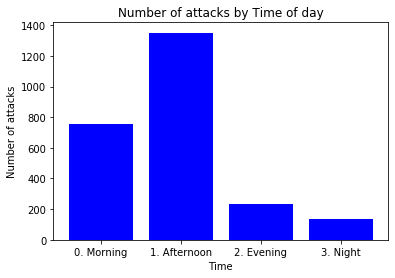

In [14]:
plt.bar(time['Time of day'],time['Attacks'], color='blue', sketch_params=False)
plt.title('Number of attacks by Time of day')
plt.xlabel('Time')
plt.ylabel('Number of attacks')
plt.show()

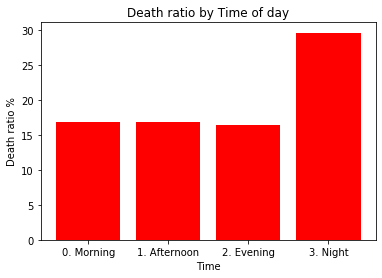

In [15]:
plt.bar(time['Time of day'],time['Deaths ratio %'], color='red', sketch_params=False)
plt.title('Death ratio by Time of day')
plt.xlabel('Time')
plt.ylabel('Death ratio %')
plt.show()

Our data shows that, contrary to what I initially thought, most reported attacks took place during the morning or the afternoon. However it also shows that most deaths by shark attack have been reported during the night. In fact, the data shows that night attakcs are **twice as deadly** as attacks during other times of the day!!!.

### 5. "Shark attack reports are more common during the summer":

Our clean_sharks dataframe should have 50 different values for the "Country" column:

In [16]:
clean_sharks["Country"].value_counts().shape

(50,)

Exactly. Now, to do this the right way we should identify the hemisphere each of these countries belongs to, which shouln't be difficult! But we want to have a quick view at the dataset, so we'll only take a sample of 5 countries for each hemisphere:

In [17]:
NE = ["USA", "BAHAMAS", "MEXICO","ITALY","PHILIPPINES"]
SE = ["AUSTRALIA","SOUTH AFRICA","PAPUA NEW GUINEA","NEW ZEALAND","BRAZIL"]

In [18]:
sharks5 = clean_sharks[(clean_sharks["Month"]!=0)&((clean_sharks["Country"].isin(NE))|(clean_sharks["Country"].isin(SE)))]

def hemisphere(country):
    if country in NE: return "NE"
    if country in SE: return "SE"

sharks5["Hemisphere"] = sharks5["Country"].apply(hemisphere)

season = pd.DataFrame()
season["Attacks"] = sharks5.groupby(["Hemisphere","Month"]).count()["Year"]
season.fillna(0,inplace=True)
season = season.reset_index().rename_axis(None).rename_axis(None, axis=1)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


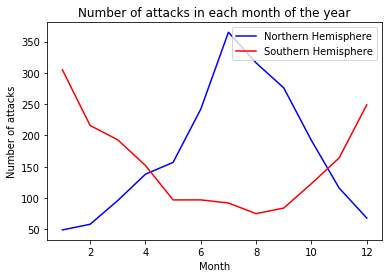

In [19]:
plt.plot(season[season["Hemisphere"]=="NE"].groupby(["Month"]).sum()["Attacks"], label = 'Northern Hemisphere', c='blue')
plt.plot(season[season["Hemisphere"]=="SE"].groupby(["Month"]).sum()["Attacks"], label = 'Southern Hemisphere', c='red')
plt.legend(loc=1)
plt.title('Number of attacks in each month of the year')
plt.xlabel('Month')
plt.ylabel('Number of attacks')
plt.show()

As we can see, the number of registered attacks is higher during the summer months for each hemisphere (aprox. jun-aug for the NE, dec-feb for the SE). Again, this could be related to many different things: warmer temperatures, people going to the beach more often, increase in icecream consumption... But to come up with rigorous conclusions, we would need to do a more detailed study.

In [23]:
sharks6 = sharks5.copy()[(sharks5["Time"]!="Unknown")&(sharks5["Age"]!=0)]

season_time = pd.DataFrame()

season_time["Attacks"] = sharks6.groupby(["Hemisphere","Month","Time of day"]).count()["Year"]
season_time["Deaths"] = sharks6[sharks6["Fatal"]=="Y"].groupby(["Hemisphere","Month","Time of day"]).count()["Year"]
season_time["Death rate %"] = (season_time["Deaths"]/season_time["Attacks"])*100
#season_time["Common victim"] = sharks6.groupby(["Hemisphere","Month","Time of day"])["Sex"].agg('mode')
season_time["Avg Age"] = sharks6.groupby(["Hemisphere","Month","Time of day"]).mean()["Age"]
season_time.fillna(0,inplace=True)
season_time = season_time.reset_index()
season_time

,Hemisphere,Month,Time of day,Attacks,Deaths,Death rate %,Avg Age
0,NE,1,0. Morning,8,1.0,12.500000,27.875000
1,NE,1,1. Afternoon,11,0.0,0.000000,34.181818
2,NE,1,3. Night,1,0.0,0.000000,20.000000
3,NE,2,0. Morning,4,3.0,75.000000,52.250000
4,NE,2,1. Afternoon,15,1.0,6.666667,26.266667
5,NE,3,0. Morning,17,0.0,0.000000,32.000000
6,NE,3,1. Afternoon,33,0.0,0.000000,25.151515
7,NE,3,2. Evening,4,1.0,25.000000,38.250000
8,NE,3,3. Night,2,0.0,0.000000,44.500000
9,NE,4,0. Morning,29,4.0,13.793103,28.862069
